<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-0:-Standard-Library" data-toc-modified-id="Part-0:-Standard-Library-0">Part 0: Standard Library</a></span><ul class="toc-item"><li><span><a href="#typing" data-toc-modified-id="typing-0.1">typing</a></span></li><li><span><a href="#os" data-toc-modified-id="os-0.2">os</a></span></li><li><span><a href="#sys" data-toc-modified-id="sys-0.3">sys</a></span></li><li><span><a href="#misc." data-toc-modified-id="misc.-0.4">misc.</a></span></li></ul></li><li><span><a href="#Part-1:-Scikit-learn-and-Matplotlib" data-toc-modified-id="Part-1:-Scikit-learn-and-Matplotlib-1">Part 1: Scikit-learn and Matplotlib</a></span><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1.1">Loading Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-1.2">Exploratory Data Analysis (EDA)</a></span></li><li><span><a href="#Data-Visualization-(matplotlib-and-seaborn)" data-toc-modified-id="Data-Visualization-(matplotlib-and-seaborn)-1.3">Data Visualization (matplotlib and seaborn)</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.4">Preprocessing</a></span></li><li><span><a href="#Evaluating-ML-Algorithms" data-toc-modified-id="Evaluating-ML-Algorithms-1.5">Evaluating ML Algorithms</a></span></li><li><span><a href="#Algorithm-Tuning" data-toc-modified-id="Algorithm-Tuning-1.6">Algorithm Tuning</a></span></li></ul></li><li><span><a href="#Part-2:-NumPy-&amp;-Pandas" data-toc-modified-id="Part-2:-NumPy-&amp;-Pandas-2">Part 2: NumPy &amp; Pandas</a></span><ul class="toc-item"><li><span><a href="#NumPy" data-toc-modified-id="NumPy-2.1">NumPy</a></span></li></ul></li><li><span><a href="#Part-3:-Deep-Learning-(PyTorch)" data-toc-modified-id="Part-3:-Deep-Learning-(PyTorch)-3">Part 3: Deep Learning (PyTorch)</a></span></li><li><span><a href="#Part-4:-Statistics" data-toc-modified-id="Part-4:-Statistics-4">Part 4: Statistics</a></span></li><li><span><a href="#Part-5:-Miscellaneous" data-toc-modified-id="Part-5:-Miscellaneous-5">Part 5: Miscellaneous</a></span></li></ul></div>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
# embed static images in the ipynb
%matplotlib inline 

----

## Part 0: Standard Library


- [ ] TODO: lists 
- [ ] TODO: dictionaries
- [ ] TODO: Typing 
- [ ] TODO: File handling 
- [ ] TODO: os 
- [ ] TODO: sys 

### typing

for static type declarations

In [11]:
from typing import List, Set, Dict, Tuple, Optional

In [12]:
# primitive types
x: int = 1
x: float = 1.0
x: bool = True
x: str = "test"
x: bytes = b"test"
    
# Collection types
x: Set[int] = {1, 2}
x: List[int] = [0]
x: Dict[str, float] = {'credit': 705.0}
x: Tuple[str, ...] = ('a', 'b', 'c')

In [ ]:
# annotation for function declarations
from typing import Callable, Iterator, Union, Optional

def fn(n: int, m: int = 2) -> int:
    return n + m

x: Callable[[int, int], int] = fn
    
    
# Iterator is for generators (functions with yield)
def generate_up_to(n: int) -> Iterator[int]:
    i = 0 
    while i <= n:
        yield i
        i += 1

https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html

### os

In [4]:
import os 
# returns the current working director as a string
os.getcwd()

'c:\\Users\\uniqu\\Adaptation\\github repos\\Master Chef'

In [5]:
# check if a path exists
path: str  = os.getcwd()
os.path.exists(path)

True

In [10]:
# Joining paths with strings
os.path.join(path, "..", "Website")

'c:\\Users\\uniqu\\Adaptation\\github repos\\Master Chef\\..\\Website'

In [11]:
os.path.exists( os.path.join(path, "..", "Website") )

True

### sys

When you use the `import` statement, a module can be loaded from the "PYTHONPATH" environment variable, the current working directory, or other directories configured when Python was installed. 

In order to access (and add to) the available Python system paths, we use the `sys` library. 

In [7]:
import sys

sys.path # module search paths

['C:\\Users\\uniqu\\Adaptation\\github repos\\Master Chef',
 'C:\\Users\\uniqu\\anaconda3\\envs\\ds_env\\python38.zip',
 'C:\\Users\\uniqu\\anaconda3\\envs\\ds_env\\DLLs',
 'C:\\Users\\uniqu\\anaconda3\\envs\\ds_env\\lib',
 'C:\\Users\\uniqu\\anaconda3\\envs\\ds_env',
 '',
 'C:\\Users\\uniqu\\anaconda3\\envs\\ds_env\\lib\\site-packages',
 'C:\\Users\\uniqu\\anaconda3\\envs\\ds_env\\lib\\site-packages\\win32',
 'C:\\Users\\uniqu\\anaconda3\\envs\\ds_env\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\uniqu\\anaconda3\\envs\\ds_env\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\uniqu\\anaconda3\\envs\\ds_env\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\uniqu\\.ipython']

Since `sys.path` is a list, it can be appended. This means modules can be installed from any desired folder by means of `sys.path.append(some_path)`.

### misc.

#### Ex: Return the attributes of an object.

You have a few options for this. Try, `dir()` and `vars()`:

In [25]:
import sklearn.datasets

obj = sklearn.datasets.load_iris()
print(f"dir(obj):\t{dir(obj)}\nfor object type:\t{type(obj)}")

dir(obj):	['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
for object type:	<class 'sklearn.utils.Bunch'>


----

## Part 1: Scikit-learn and Matplotlib

### Loading Data  

#### Ex: Load toy datasets in sklearn (from `sklearn.datasets`).

#### Ex: Return the attributes of an object.

You have a few options for this. Try, `dir()` and `vars()`:

In [25]:
import sklearn.datasets

obj = sklearn.datasets.load_iris()
print(f"dir(obj):\t{dir(obj)}\nfor object type:\t{type(obj)}")

dir(obj):	['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
for object type:	<class 'sklearn.utils.Bunch'>


In [52]:
import sklearn.datasets

sklearn_dataset = sklearn.datasets.load_breast_cancer()
dir(sklearn_dataset) # Display attributes of sklearn.utils.Bunch object

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [57]:
type(sklearn_dataset)

sklearn.utils.Bunch

In [58]:
# sklearn.utils.Bunch description
type(sklearn_dataset.DESCR)

str

In [59]:
print(sklearn_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [38]:
sklearn_dataset.data

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

#### Ex: Convert `sklearn.datasets` dataset into a `pd.DataFrame`.

In [20]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
boston_df  = pd.DataFrame(boston.data) # Set column indices as feature names
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target # Specify 'PRICE' as the target variable
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


----

### Exploratory Data Analysis (EDA)

- Statistical descriptions
- Data visualization (matplotlib and seaborn)

#### Ex: Correlation matrix

In [13]:
# Convert sklearn.datasets dataset into a pd.DataFrame.
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
boston_df  = pd.DataFrame(boston.data) # Set column indices as feature names
boston_df.columns = boston.feature_names
boston_df['PRICE'] = boston.target # Specify 'PRICE' as the target variable
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


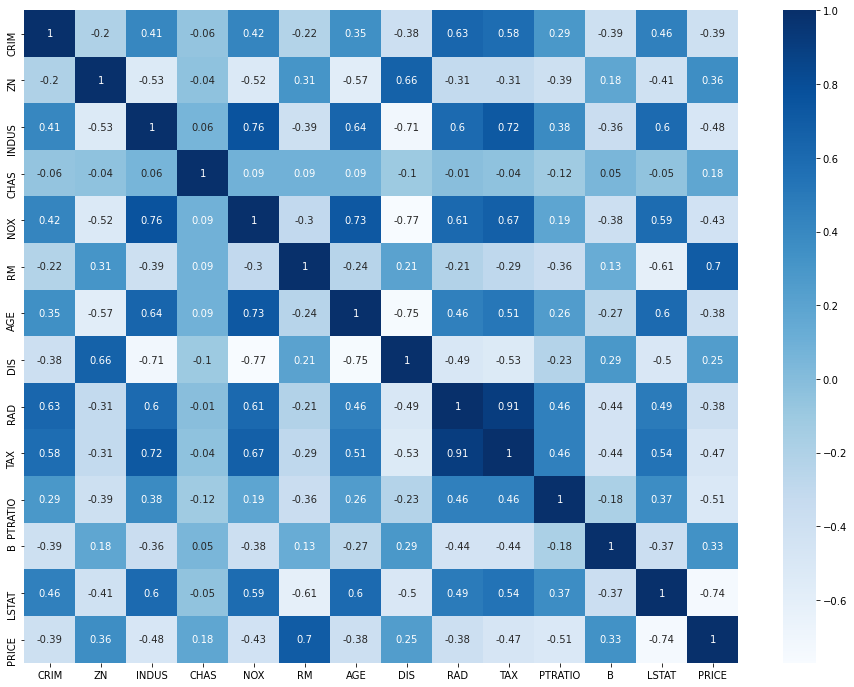

In [17]:
# Plot correlation matrix from a pd.DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix: pd.DataFrame = boston_df.corr().round(2)
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

### Data Visualization (matplotlib and seaborn)

#### Ex: Random Walk: [wikipedia link](https://en.wikipedia.org/wiki/Random_walk#:~:text=In%20mathematics%2C%20a%20random%20walk,space%20such%20as%20the%20integers.)

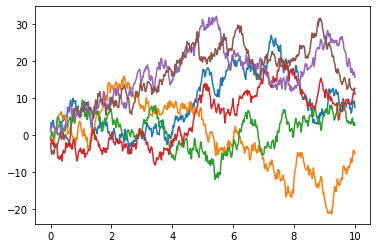

In [2]:
# Generate simple random walk plot 
rng = np.random.RandomState(1)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0) # sample 500 by 6 array from std normal dist
plt.plot(x, y)

Q: What does the `np.cumsum` method do?
> Return the **cumulative sum** of the elements of a `np.ndarray` along a given axis.

Q: What does the `np.linspace` method do?
> Return a `np.ndarray` of evenly spaced numbers over a specified interval.

#### Ex: 

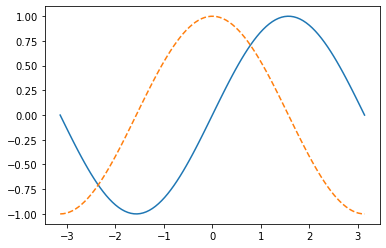

In [3]:
# plot sine and cosine graphs from -pi to pi
x = np.linspace(start=-np.pi, stop=np.pi, num=100)  
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

Q: What is the type of `plt.figure`?
- `function` | a method inside the matplotlib.pyplot module

Q: What does the `plt.figure` method do?
- Create a new figure, or activate an existing figure.

Q: The figure object generated by `plt.figure()` has what type?
- `mpl.figure.Figure`

In [4]:
fig = plt.figure()
type(fig)

matplotlib.figure.Figure

<Figure size 432x288 with 0 Axes>

Q: Save the figure to the working directory as a png.

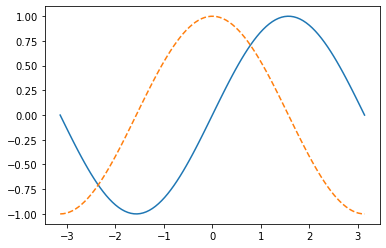

In [5]:
# plot sine and cosine graphs from -pi to pi
x = np.linspace(start=-np.pi, stop=np.pi, num=100)  
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

In [6]:
fig.savefig('trig_functions.png')

Q: Use markdown to confirm that the image, 'trig_functions.png', is saved in the working directory.
```markdown
![image info](trig_functions.png)
```

![image info](trig_functions.png)

Q: Use a Jupyter module to confirm that the image, 'trig_functions.png', is saved in the working directory.

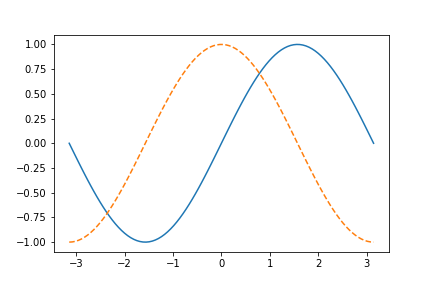

In [7]:
from IPython.display import Image
Image("trig_functions.png")

cloze: 
- In the `mpl.figure.Figure.savefig()` method, the file format is inferred from the extension of the given filename.

In [8]:
# Display supported file types for the mpl.figure.Figure.savefig() method.
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

#### Ex: Creat a grid of plots with the object-oriented interface

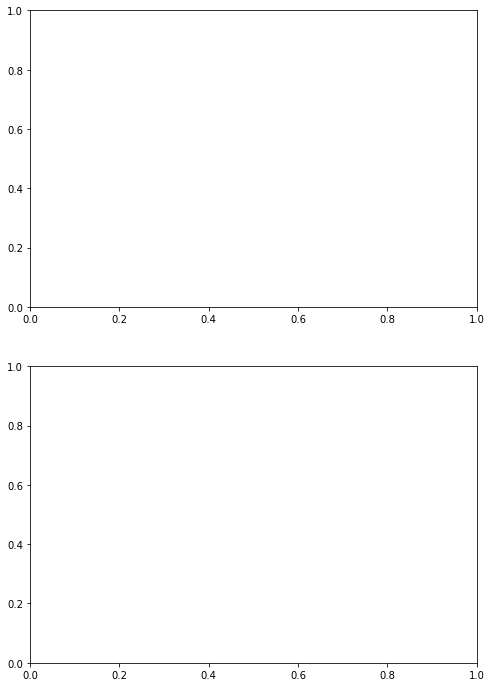

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

x = np.linspace(start=-10, stop=10, num=100)

In [10]:
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

Q: What's the type of `ax`?

AxesSubplot

matplotlib.axes._subplots.AxesSubplot

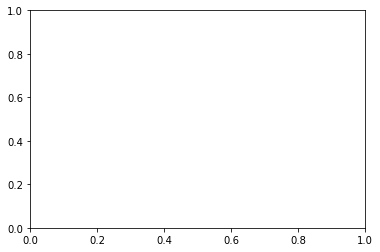

In [11]:
fig, ax = plt.subplots()
type(ax)

Q: What's the type of `fig`?

In [12]:
type(fig)

matplotlib.figure.Figure

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._subplots.AxesSubplot'>


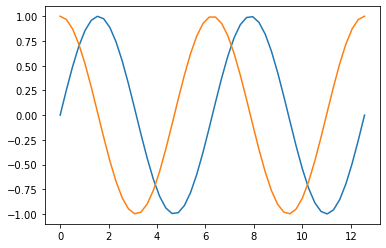

In [13]:
# simple sinusoids using figure and axes instances
fig, ax = plt.subplots()

x = np.linspace(start=0, stop=4*np.pi)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x))
print(type(fig), type(ax))

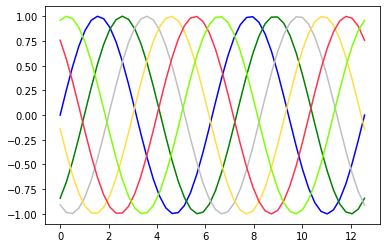

In [14]:
fig, ax = plt.subplots()
x = np.linspace(start=0, stop=4*np.pi)
# Line colors
ax.plot(x, np.sin(x - 0), color='blue') # specify color by name
ax.plot(x, np.sin(x - 1), color='g') # short color code (rgbcmyk)
ax.plot(x, np.sin(x - 2), color='0.75') # Grayscale between 0 and 1
ax.plot(x, np.sin(x - 3), color='#FFDD44') # Hex code (RRGGBB from 00 to FF)
ax.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
ax.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

rgbcmyk: cmyk stands for Cyan, Magenta, Yellow, blacK

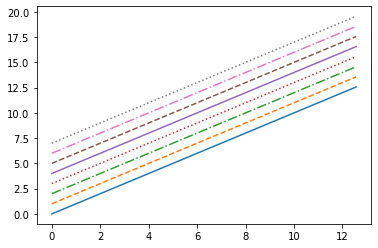

In [15]:
fig, ax = plt.subplots()
x = np.linspace(start=0, stop=4*np.pi)

# Line styles
ax.plot(x, x + 0, linestyle='solid')
ax.plot(x, x + 1, linestyle='dashed')
ax.plot(x, x + 2, linestyle='dashdot')
ax.plot(x, x + 3, linestyle='dotted');
# shorthand for line styles
ax.plot(x, x + 4, linestyle='-') # solid
ax.plot(x, x + 5, linestyle='--') # dashed
ax.plot(x, x + 6, linestyle='-.') # dashdot
ax.plot(x, x + 7, linestyle=':'); # dotted

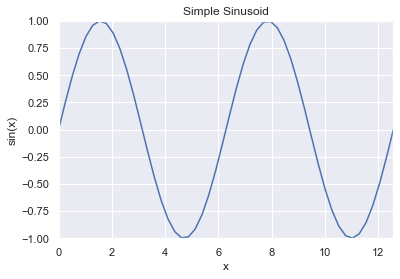

In [4]:
# Set multiple properties of an AxesSubplot with ax.set() method
x = np.linspace(start=0, stop=4*np.pi)

ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0,4*np.pi), ylim=(-1, 1),
       xlabel='x', ylabel='sin(x)',
      title='Simple Sinusoid');

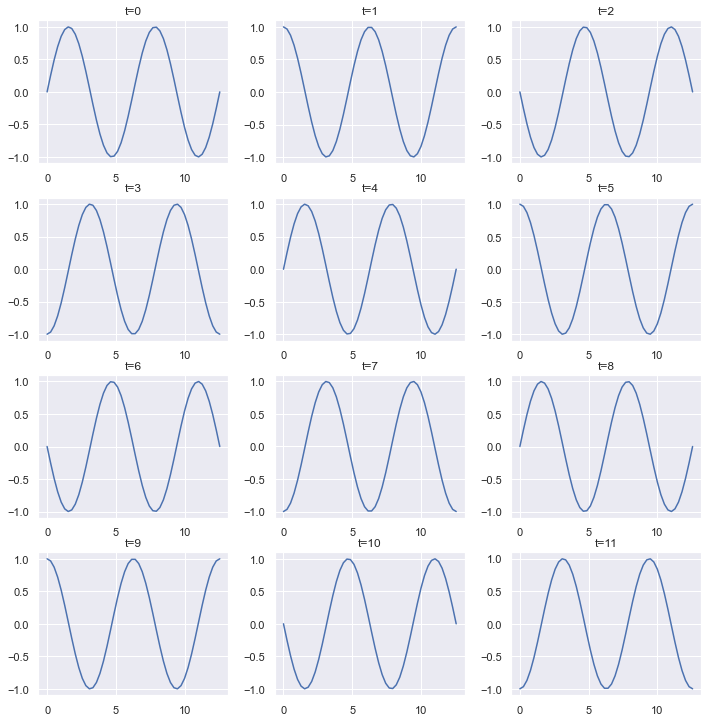

In [5]:
fig, ax_array = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
fig.tight_layout() # prevents subplots from overlapping

count = 0
shift = 0
for row in ax_array:    
    for axes in row:
        axes.plot(x, np.sin(x + shift))
        axes.set(title='t='+ str(count))
        count += 1
        shift += np.pi / 2

In [39]:
# currently in Section 4.2.3: Labeling Plots

----

<a id='s3'></a>
 
### Preprocessing

- Data cleaning
- Feature selection
- Feature Engineering
- Data transforms 


#### Null Values

In [ ]:
def check_null_values(df):
    """Check if there are missing values in a pd.DataFrame."""
    n_col = len(df.columns)
    null_counts = np.array(df.isnull().sum())
    
    if np.any(null_counts) == False:
        print("The DataFrame has no null values.")
    else:
        return df.isnull().sum()

#### Ex: Train-test split (random)

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')

def tt_split(data):
    # Specify feature and target matrix
    if isinstance(data, pd.DataFrame):
        X, Y = data.iloc[:, :4], data.iloc[:, -1]
    elif isinstance(data, np.ndarray):
        X, Y = data[:, :4], data[:, -1].astype(float)

    # Perform train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y, test_size=0.3, random_state=7)
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = tt_split(df) 

#### Scaling

In [19]:
from sklearn import preprocessing
def scale_data(X_train, X_test, type="standard"):
    scaler = (preprocessing.StandardScaler() 
        if type == "standard"
        else preprocessing.MinMaxScaler())

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

# Gives minimum of 0, max of 1
X_train, X_test = scale_data(X_train, X_test, "minmax")
pd.DataFrame(X_train).describe()

,0,1,2,3
count,105.000000,105.000000,105.000000,105.000000
mean,0.419841,0.437698,0.441708,0.440476
std,0.238684,0.186081,0.310910,0.324495
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.068966,0.041667
50%,0.388889,0.416667,0.517241,0.500000
75%,0.555556,0.541667,0.689655,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [18]:
# Gives mean of 0, standard dev of 1
X_train, X_test = scale_data(X_train, X_test, "standard")
pd.DataFrame(X_train).describe()

,0,1,2,3
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,-1.586033e-17,6.608470e-18,5.498247e-17,-1.057355e-17
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.767423e+00,-2.363473e+00,-1.427509e+00,-1.363931e+00
25%,-8.319249e-01,-5.635479e-01,-1.204626e+00,-1.234910e+00
50%,-1.303015e-01,-1.135667e-01,2.441093e-01,1.843150e-01
75%,5.713219e-01,5.614051e-01,8.013153e-01,8.294174e-01
max,2.442318e+00,3.036302e+00,1.804286e+00,1.732561e+00


----

### Evaluating ML Algorithms

- Test options and evaluation metrics
- "Benchmark" algorithms
- Compare algorithms



In [1]:
from sklearn import metrics

# metrics.auc?
# metrics.roc_auc_score?

----

### Algorithm Tuning

----

## Part 2: NumPy & Pandas

### NumPy

#### Ex: Generalized argmax function for an np.ndarray

In [3]:
def get_index_n_highest(a, n):
    """
    Arguments:
        a (np.ndarray, 1D): input vector
        n (int): how many of the highest indices you want
    
    Returns:
        highest_indices (np.ndarray): array containing the inidices of 
            the n highest elements
            
    Examples:
    --------
    Return the indices of the rows containing the 6 highest values in 
    the last column of A, a 2x2 matrix.
    
    >>> import numpy as np
    >>> import copy
    >>> rng = np.random.RandomState(7)
    >>> A = rng.randint(low=1, high=100, size=(25,25))
    >>> last_col = A[:,-1].copy()
    
    >>> get_index_n_highest(last_col, 6)
    array([12  8 23 13 21 20])
    >>> last_col[highest_indices]
    array([92, 90, 88, 85, 83, 77])
    """
    
    highest_indices = a.argsort()[-n:][::-1]
    return highest_indices

In [1]:
import numpy as np
rng = np.random.RandomState()



In [2]:
M = rng.random((3,4))
np.min(M,v axis=1)

array([0.19420218, 0.01785097, 0.10316366])

----

## Part 3: Deep Learning (PyTorch)

In [ ]:
# TODO: Dataset 

# TODO: Dataloader

# TODO: Feed Forward Neural Network (Classification)

# TODO: Feed Forward Neural Netowrk (Regression)

# TODO: Recurrent Neural Network on sequential data

# TODO: CNN for Image classification

# TODO: NLP

# TODO: Simple GANs

Just uncomment the next cell if you need to install. 

In [ ]:
# !pip install pytorch_lightning --quiet

In [ ]:
import pytorch_lightning as pl

----

## Part 4: Statistics

In [13]:
from scipy import stats

# stats.norm (norm_gen): A normal continuous random variable
mean, var = stats.norm.stats(loc=0, scale=1, moments="mv")
    # loc kw specifies mean
    # scale kw specifies var
mean, var, skew, kurt = stats.norm.stats(loc=0, scale=1, moments="mvsk")

stats.norm.rvs(size=5)

array([-0.03938269, -0.88689293, -2.97651399, -0.33540201, -1.07051811])

In [14]:
stats.norm?

----

## Part 5: Miscellaneous

#### Anki Interval Modifier

Informed by the [Janki method](http://www.jackkinsella.ie/articles/janki-method-refined) and my own personal research, it's clear that the interval modifier should be set in such a way that the desired mature retention rate is achieved. In the Anki manual (i.e. SuperMemo), an equation based on Ebbinghaus's [forgetting curve](https://en.wikipedia.org/wiki/Forgetting_curve) is cited from SuperMemo as being able to calculate what setting Anki's interval modifier should have for a desired retention rate. - See [docs.ankiweb.net](https://docs.ankiweb.net/#/deck-options?id=reviews).

In [17]:
import numpy as np
# Note, the arrow is a type hint: https://www.python.org/dev/peps/pep-0484/

def calcIntervalModifier(modifier_now, success_now, success_wanted=0.85) -> int:
    """Calculates the interval modifier needed for a target retention rate in Anki.
    
    Args: 
        modifier_now (int): Current interval modifier. 
        success_wanted (real number): Desired retention rate. This can be lower
            or higher than `success_now` depending on your goals. 
        success_now (real number): Current mature retention rate.
    Returns:
        modifier_new (int): Optimal interval modifier.
    
    Examples:
    --------
    Suppose you have a mature accuracy of 96% for the past month in a deck.
    If you interval modifier is currently set to 100%, you could acheive higher
    efficiency by studying more cards and lowering the accuracy to 90%, and 
    even higher efficiency by going down to 80 or 85%.
    
    >>> calcIntervalModifier(100, .96, .90)
    258
    
    The above indicates an optimal setting of 258% for the interval modifier.
    
    >>> calcIntervalModifier(130, .95)
    412
    """
    modifier_new = modifier_now * np.log(success_wanted) / np.log(success_now)
    modifier_new = round(modifier_new)
    
    return modifier_new

#### Sharing conda virtual environments

In order to save an environment's packages and versions so that the environment can quickly be reproduced, you need the `environment.yml`. To get one named "env_name", activate your environment in the conda prompt and then enter:
```
conda env export > env_name.yml
```

This will create a file in the current working directory. Then, recreate the environment from the YAML file:
```
conda env create -f env_name.yml
```

To verify the installation, enter `conda env list` and then activate the env with `conda activate env_name`. Entering `conda info --envs` will also work.

source: [docs.conda.io](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)
